In [1]:
import numpy as np
import matplotlib.pyplot as plt

plt.rcParams['font.sans-serif'] = "arial"
plt.rcParams['font.family'] = "arial"
plt.rcParams['font.size'] = 18
plt.rcParams['lines.linewidth'] = 3
plt.rcParams['axes.linewidth'] = 3 #set the value globally

plt.rcParams['xtick.major.size'] = 10
plt.rcParams['xtick.major.width'] = 3
plt.rcParams['ytick.major.size'] = 10
plt.rcParams['ytick.major.width'] = 3

## Plot Shapes

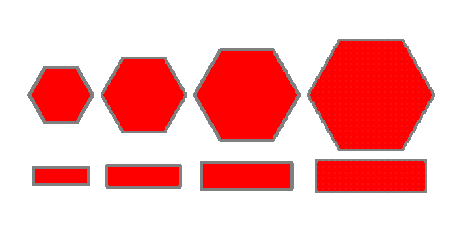

In [16]:
### Hexagon ###
fig, ax = plt.subplots(1,1,figsize=[8,4])

shapes = np.array([150, 200, 250, 300])

xmidpoint= np.array([ 0, 0, 0, 0, 0])
DS = ['1', '2', '2', '3']
num_points_hex = np.zeros(len(shapes))
xrange = np.zeros((2, len(shapes)))
yrange = np.zeros((2, len(shapes)))
zrange = np.zeros((2, len(shapes)))

for i, val in enumerate(shapes):
    data = np.loadtxt( str('size_dep_study/size_') + str(val) + str('nm-shell/spectra/hex/shape.dat'),skiprows=7)    
    num_points_hex[i] = len(data[:,1])
    x = data[:,1]*float(DS[i])
    y = data[:,2]*float(DS[i])
    z = data[:,3]*float(DS[i])    
    xrange[0, i], xrange[1, i] = min(x), max(x)
    yrange[0, i], yrange[1, i] = min(y), max(y)
    zrange[0, i], zrange[1, i] = min(z), max(z)

    a = 20
    if i == 0: right_offset = 0
    else: right_offset += yrange[1,i-1] + a - yrange[0,i]
    
    ICOMP = data[:,4]
    idx_plotm = np.where((ICOMP==1) & (y==0))
    idx_plots = np.where((ICOMP==2) & (y==0))
    
    ax.scatter(z[idx_plotm]+right_offset, x[idx_plotm]-200, marker='s', c='red', s=1)
    ax.scatter(z[idx_plots]+right_offset, x[idx_plots]-200, marker='s', c='gray', s=1)


    idx_plotm = np.where((ICOMP==1) & (x==xmidpoint[i]))
    idx_plots = np.where((ICOMP==2) & (x==xmidpoint[i]))
    ax.scatter(y[idx_plotm]+right_offset, z[idx_plotm], marker='s', c='red', s=1)
    ax.scatter(y[idx_plots]+right_offset, z[idx_plots], marker='s', c='gray', s=1)
    
ax.axis('equal');
ax.axis('off');

fig.savefig('figures/size_dep_hex_shapes.pdf')

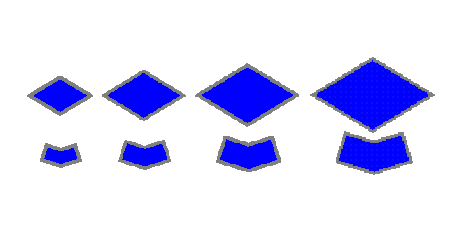

In [17]:
### Kite ###
fig, ax = plt.subplots(1,1,figsize=[8,4])

shapes = np.array([150, 200, 250, 300])

xmidpoint= np.array([ 0, 0, 0, 0, 0])
DS = ['1', '2', '2', '3']
num_points_kite = np.zeros(len(shapes))
xrange = np.zeros((2, len(shapes)))
yrange = np.zeros((2, len(shapes)))
zrange = np.zeros((2, len(shapes)))

for i, val in enumerate(shapes):
    data = np.loadtxt( str('size_dep_study/size_') + str(val) + str('nm-shell/spectra/kite/shape.dat'),skiprows=7)    
    num_points_kite[i] = len(data[:,1])

    x = data[:,1]*float(DS[i])
    y = data[:,2]*float(DS[i])
    z = data[:,3]*float(DS[i])    
    xrange[0, i], xrange[1, i] = min(x), max(x)
    yrange[0, i], yrange[1, i] = min(y), max(y)
    zrange[0, i], zrange[1, i] = min(z), max(z)

    a = 20
    if i == 0: right_offset = 0
    else: right_offset += yrange[1,i-1] + a - yrange[0,i]
    
    ICOMP = data[:,4]
    idx_plotm = np.where((ICOMP==1) & (y==0))
    idx_plots = np.where((ICOMP==2) & (y==0))
    
    ax.scatter(z[idx_plotm]+right_offset, x[idx_plotm]-150, marker='s', c='blue', s=1)
    ax.scatter(z[idx_plots]+right_offset, x[idx_plots]-150, marker='s', c='gray', s=1)


    idx_plotm = np.where((ICOMP==1) & (x==xmidpoint[i]))
    idx_plots = np.where((ICOMP==2) & (x==xmidpoint[i]))
    ax.scatter(y[idx_plotm]+right_offset, z[idx_plotm], marker='s', c='blue', s=1)
    ax.scatter(y[idx_plots]+right_offset, z[idx_plots], marker='s', c='gray', s=1)
    
ax.axis('equal');
ax.axis('off');

fig.savefig('figures/size_dep_kite_shapes.pdf')

## Load Spectra and Temperatures

In [4]:
size = np.array([150, 200, 250, 300])

wave_hex = []
wave_kite = []
abs_cross_hex = []
abs_cross_kite = []

maxT_hex = np.zeros(len(size))
maxT_kite = np.zeros(len(size))
skip = np.array([0, 0, 12, 12])

for idx, size_val in enumerate(size):
    
    ## Spectra Hexagons ##
    data_hex = np.loadtxt(str('size_dep_study/size_') + str(size_val) + str('nm-shell/spectra/hex/Spectrum'))
    data_hex_spectra =  data_hex[data_hex[:,1].argsort(),]
    wave_hex.append(data_hex_spectra[:,1]*1000)
    abs_cross_hex.append(data_hex_spectra[:,3]*np.pi*data_hex_spectra[:,0]**2)
    
    ## Spectra Kite ##
    data_kite = np.loadtxt(str('size_dep_study/size_') + str(size_val) + str('nm-shell/spectra/kite/Spectrum'))
    data_kite_spectra =  data_kite[data_kite[:,1].argsort(),]
    wave_kite.append(data_kite_spectra[:,1]*1000)
    abs_cross_kite.append(data_kite_spectra[:,3]*np.pi*data_kite_spectra[:,0]**2)

    ## Temps Hexagons ##
    data_hex = np.loadtxt(str('size_dep_study/size_') + str(size_val) + str('nm-shell') +str('/temps/hex/temp.out'),skiprows=skip[idx])
    maxT_hex[idx] = max(data_hex[:,3])

    ## Temps Kite ##
    data_kite = np.loadtxt(str('size_dep_study/size_') + str(size_val) + str('nm-shell') +str('/temps/kite/temp.out'),skiprows=skip[idx])
    maxT_kite[idx] = max(data_kite[:,3])

## Plot it Up!

[0.028 0.033 0.037 0.048]
[34.332851 32.215282 29.108986 31.430256]


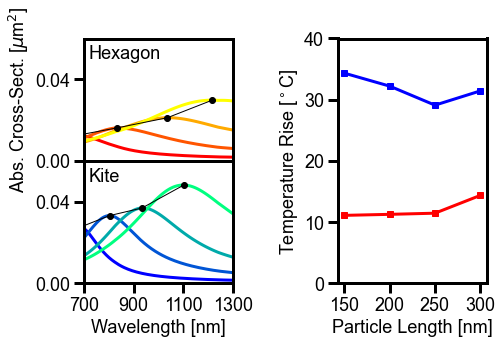

In [9]:
import matplotlib.gridspec as gridspec

fig = plt.figure(figsize=[8,5])
gs = gridspec.GridSpec(2, 2,hspace=0,wspace=.7)

ax0 = fig.add_subplot(gs[0, 0])
ax1 = fig.add_subplot(gs[1, 0])
ax2 = fig.add_subplot(gs[:,1])

colors_hex = plt.cm.autumn(np.linspace(0,1,len(size)))
colors_kite = plt.cm.winter(np.linspace(0,1,len(size)))

wave_hex_lspr = []
wave_kite_lspr = []
abs_hex_lspr = []
abs_kite_lspr = []

for idx, size_val in enumerate(size):
    ax0.plot(wave_hex[idx], abs_cross_hex[idx], color=colors_hex[idx], label=str(size_val)+str(' nm'))
    ax1.plot(wave_kite[idx], abs_cross_kite[idx], color=colors_kite[idx], label=str(size_val)+str(' nm'))
    
    idx_hex = np.where(abs_cross_hex[idx] == max(abs_cross_hex[idx]))[0][0]
    idx_kite = np.where(abs_cross_kite[idx] == max(abs_cross_kite[idx]))[0][0]

    wave_hex_lspr.append(wave_hex[idx][idx_hex])
    wave_kite_lspr.append(wave_kite[idx][idx_kite])
    abs_hex_lspr.append(max(abs_cross_hex[idx]))
    abs_kite_lspr.append(max(abs_cross_kite[idx]))

ax0.plot(wave_hex_lspr, abs_hex_lspr, c='black', linestyle='solid', zorder=3, linewidth=1, marker='o')
ax1.plot(wave_kite_lspr, abs_kite_lspr, c='black', linestyle='solid', zorder=3, linewidth=1, marker='o')


ax2.plot(size, maxT_hex, color='red', marker='s', label='Hex')
ax2.plot(size, maxT_kite, color='blue',marker='s', label='Kite')

    
ax0.set_xlim([700, 1300]); ax1.set_xlim([700, 1300])
ax0.set_xticks([]); ax1.set_xticks(np.linspace(700,1300,4)); 
ax0.set_ylim([0, 0.06]); ax1.set_ylim([0, 0.06]); 
ax0.set_yticks([0, 0.04]); ax1.set_yticks([0, 0.04]); 

ax1.set_xlabel('Wavelength [nm]')

ax2.set_xticks(size)
ax2.set_ylim([0,40]);
ax2.set_xlabel('Particle Length [nm]')
ax2.set_ylabel('Temperature Rise [$^\circ$C]')


ax0.set_ylabel('Abs. Cross-Sect. [$\mu$m$^2$]');
fig.patch.set_facecolor('white')
# ax0.legend(frameon=False, loc='upper right', 
#            handlelength=.7, handletextpad=.4,
#              fontsize=15,
#              bbox_to_anchor=(1.4,1.05)
#             )
ax0.text(720,.05, "Hexagon")

# ax[1].legend(frameon=False, loc='upper right', 
#            handlelength=.7, handletextpad=.4,
#              fontsize=15,
#              bbox_to_anchor=(1.4,1.05)
#             )
ax1.text(720,.05, "Kite")

print(np.round(abs_kite_lspr,3))
print(maxT_kite)

fig.subplots_adjust(bottom=.2, left=.2)
fig.savefig('size_dep_study.pdf')

[301129.  78746. 150219.  75581.]


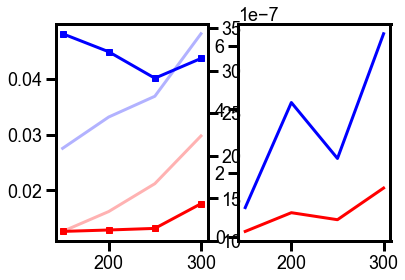

In [25]:
fig, ax = plt.subplots(1,2)
ax[0].plot(size, abs_hex_lspr, color='red', alpha=.3)
ax[0].plot(size, abs_kite_lspr, color='blue', alpha=.3)
ax2 = ax[0].twinx()
ax2.plot(size, maxT_hex, color='red', marker='s', label='Hex')
ax2.plot(size, maxT_kite, color='blue', marker='s', label='Kite')

ax[1].plot(size, abs_kite_lspr/num_points_kite, color='blue')

ax[1].plot(size, abs_hex_lspr/num_points_hex, color='red')


print(num_points_kite)